Introduction to DataScience - DataSciencester
=====

The code contained within this notebook is from Ch. 1 of *Data Science from Scratch* by J. Grus.

Imagine that we would like to look at relationships in a company.  We could think of each person as node in a graph and an edge between nodes would represent a frienship.  

In [ ]:
MY_NAME = "Chris Phillips" # <-- Your name here
GROUP_ID = "4" # <-- Your group id here

Imagine that we would like to look at relationships in a company. We could think of each person as node in a graph and an edge between nodes would represent a frienship.

In [10]:
users = [
    { "id": 0, "name": "Hero"},
    { "id": 1, "name": "Dunn"},
    { "id": 2, "name": "Sue"},
    { "id": 3, "name": "Chi"},
    { "id": 4, "name": "Thor"},
    { "id": 5, "name": "Clive"},
    { "id": 6, "name": "Hicks"},
    { "id": 7, "name": "Devin"},
    { "id": 8, "name": "Kate"},
    { "id": 9, "name": "Klein"},
]

friendships = [(0,1), (0,2), (1,2), (1,3), (2,3), (3,4), 
               (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)]

for user in users:
    print user

{'id': 0, 'name': 'Hero'}
{'id': 1, 'name': 'Dunn'}
{'id': 2, 'name': 'Sue'}
{'id': 3, 'name': 'Chi'}
{'id': 4, 'name': 'Thor'}
{'id': 5, 'name': 'Clive'}
{'id': 6, 'name': 'Hicks'}
{'id': 7, 'name': 'Devin'}
{'id': 8, 'name': 'Kate'}
{'id': 9, 'name': 'Klein'}


We might want to include a list of friends for each user.  For each tuple in the list of friendships, we will add the id of the friend to the friends list for each user.  

In [11]:
for user in users:
    user["friends"] = []

for i, j in friendships:
    #print i, j  
    users[i]["friends"].append(users[j]["id"])
    users[j]["friends"].append(users[i]["id"])

We could check our progress by printing out the contents of each user, along with its index in the `users` list.  

In [12]:
for i, user in enumerate(users):
    print i, user

0 {'friends': [1, 2], 'id': 0, 'name': 'Hero'}
1 {'friends': [0, 2, 3], 'id': 1, 'name': 'Dunn'}
2 {'friends': [0, 1, 3], 'id': 2, 'name': 'Sue'}
3 {'friends': [1, 2, 4], 'id': 3, 'name': 'Chi'}
4 {'friends': [3, 5], 'id': 4, 'name': 'Thor'}
5 {'friends': [4, 6, 7], 'id': 5, 'name': 'Clive'}
6 {'friends': [5, 8], 'id': 6, 'name': 'Hicks'}
7 {'friends': [5, 8], 'id': 7, 'name': 'Devin'}
8 {'friends': [6, 7, 9], 'id': 8, 'name': 'Kate'}
9 {'friends': [8], 'id': 9, 'name': 'Klein'}


This is great, but looking the graph might be a better way to quickly see the relationships.  

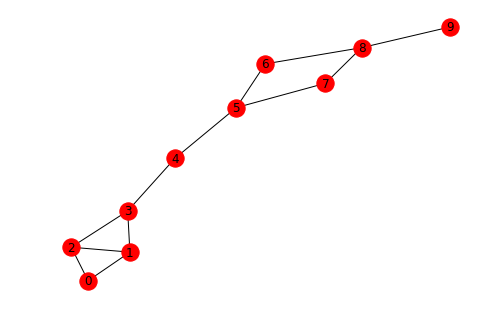

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
G = nx.Graph()

G.add_edges_from(friendships)
nx.draw(G, with_labels = True)

Now suppose we are interested in how friendly our company is.  We could calculate the total number of friends.  

In [15]:
def number_of_friends(user):
    return len(user["friends"])

# For each user in users, run number_of_friends on the user and then sum up the results.  
total_friendships = len(friendships)

print total_friendships

12


1. Do you see anything wrong with this calculation?

**Answer:** Friendships are being double-counted.
    
2. How else could you determine the number of friendships?

**Answer:** We could count the number of edges in the graph (i.e. `len(friendships)`)

We might want to know how friendly a `user` on average.  Let's calculate the average number of friends.

In [16]:
from __future__ import division
number_of_users = len(users)

average_friends_per_user = total_friendships / number_of_users

print average_friends_per_user

1.2


What about determining who the friendliest users are?  We'll give them an award!

In [17]:
# create a list (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]
                      
sorted(num_friends_by_id, key=lambda (user_id, num_friends): num_friends, reverse=True)



[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

Let's visualize this.  We'll make the node size proportional to the number of friends.

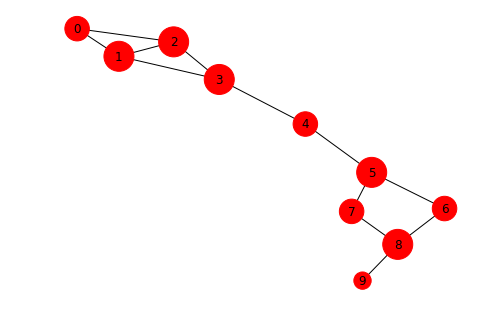

In [18]:
nx.draw(G, with_labels = True, node_size = [300 * number_of_friends(user) for user in users])

Well, it seems that we could do better.  We need to be a friendlier place so let's recommend some possible friends to users.  Now, we could randomly pick users that are not in a user's friend list but it seems that we could easily do better than that.  Let's recommend the friends of a user's friends as possible friends.  

In [19]:
def friends_of_friends_ids(users, id):
    return [foaf_id 
            for f_id in users[id]["friends"]
            for foaf_id in users[f_id]["friends"]
            if foaf_id != id]

print friends_of_friends_ids(users, 3)





[0, 2, 0, 1, 5]


In [20]:
from collections import Counter
print Counter( friends_of_friends_ids(users, 3) )

Counter({0: 2, 1: 1, 2: 1, 5: 1})


3. What is going on in the block of code above?  Why might we want to do this?

**Answer:** How many times a certain user shows up in mutual friends. To see which friends of friends would be the greatest match.